<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set_style("darkgrid")

period_0_df = pd.read_csv('period_0.csv')
period_1_df = pd.read_csv('period_1.csv')
period_2_df = pd.read_csv('period_2.csv')
period_3_df = pd.read_csv('period_3.csv')

In [2]:
# Aperçu des données
period_0_df.head()

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67


In [3]:
print("The shape of our data : {}".format(period_0_df.shape))

The shape of our data : (1000, 10)


In [4]:
# Pour obtenir des informations sur le nombre de lignes, le nombre de colonnes et le type de données de chaque colonne
period_0_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Seniority            1000 non-null   int64  
 2   Orders               1000 non-null   int64  
 3   Items                1000 non-null   int64  
 4   AverageDiscount      1000 non-null   float64
 5   TopCategory          1000 non-null   object 
 6   BrowsingTime         1000 non-null   float64
 7   EmailsOpened         1000 non-null   int64  
 8   SupportInteractions  1000 non-null   int64  
 9   TotalCart            1000 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 78.2+ KB


In [5]:
period_0_df.describe().round(decimals=2)

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,24.07,0.51,3.01,5.98,0.37,97.95,0.99,1.01,35.88
std,5.06,0.72,1.73,2.40,0.22,100.22,1.00,1.02,17.62
min,7.00,0.00,0.00,1.00,0.00,0.01,0.00,0.00,0.00
25%,21.00,0.00,2.00,4.00,0.18,29.33,0.00,0.00,25.58
50%,24.00,0.00,3.00,6.00,0.38,68.04,1.00,1.00,33.66
75%,27.00,1.00,4.00,7.00,0.56,127.06,2.00,2.00,43.77
max,41.00,4.00,9.00,15.00,0.75,831.03,5.00,7.00,138.88


In [6]:
period_0_df.isna().sum()

Age                    0
Seniority              0
Orders                 0
Items                  0
AverageDiscount        0
TopCategory            0
BrowsingTime           0
EmailsOpened           0
SupportInteractions    0
TotalCart              0
dtype: int64

In [7]:
# Liste de toutes les catégories uniques dans la colonne TopCategory
unique_categories = period_0_df['TopCategory'].unique()
print("Liste des catégories uniques : ", unique_categories)

# Encoder les catégories en nombres entiers
le = LabelEncoder()

period_0_df['TopCategory'] = le.fit_transform(period_0_df['TopCategory'])

# Afficher les catégories encodées
print("Catégories encodées : ", period_0_df['TopCategory'].unique())
category_names = le.classes_

Liste des catégories uniques :  ['Clothing,Shoes & Jewelry' 'Toys & Games' 'Health, Household & Baby Care'
 'Electronics' 'Home & Kitchen' 'Pet Supplies' 'Beauty & Personal Care'
 'Sports & outdoors' 'Office Supplies']
Catégories encodées :  [1 8 3 2 4 6 0 7 5]


In [8]:
period_0_df.head()

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,1,68.473629,3,2,34.00
1,22,0,4,5,0.50,8,29.258063,1,0,28.28
2,22,1,2,6,0.37,3,11.515517,0,0,19.33
3,19,0,2,8,0.60,8,74.495861,1,0,26.83
4,25,1,1,5,0.58,8,1.682705,2,1,17.67


In [9]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de validation avec une répartition 80/20

X0 = period_0_df.drop('TotalCart', axis=1)
y0 = period_0_df['TotalCart']

X_train, X_val, y_train, y_val = train_test_split(X0, y0, test_size=0.2, random_state=43)

# Pour vérifier la taille des ensembles d'entraînement et de validation
print(f'Taille de l\'ensemble d\'entraînement : {len(X_train)}')
print(f'Taille de l\'ensemble de validation : {len(X_val)}')


Taille de l'ensemble d'entraînement : 800
Taille de l'ensemble de validation : 200


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialisation des modèles
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Entraînement des modèles sur l'ensemble d'entraînement
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédictions sur l'ensemble de validation
y_pred_lr = lr.predict(X_val)
y_pred_dt = dt.predict(X_val)
y_pred_rf = rf.predict(X_val)

# Calcul de l'erreur quadratique moyenne (RMSE) pour chaque modèle
rmse_lr = mean_squared_error(y_val, y_pred_lr, squared=False)
rmse_dt = mean_squared_error(y_val, y_pred_dt, squared=False)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)

# Calcul de coefficient de détermination (R2) pour chaque modèle
r2_lr = r2_score(y_val, y_pred_lr)
r2_dt = r2_score(y_val, y_pred_dt)
r2_rf = r2_score(y_val, y_pred_rf)

In [12]:
# Afficher les performances des modèles
print("Performance des modèles sur l'ensemble de validation pour la période 0:")
print("---------------------------------------------")
print("Régression linéaire :")
print("RMSE = ", rmse_lr)
print("R2 score = ", r2_lr)
print("---------------------------------------------")
print("Arbre de décision :")
print("RMSE = ", rmse_dt)
print("R2 score = ", r2_dt)
print("---------------------------------------------")
print("Forêt aléatoire :")
print("RMSE = ", rmse_rf)
print("R2 score = ", r2_rf)
print("---------------------------------------------")

Performance des modèles sur l'ensemble de validation pour la période 0:
---------------------------------------------
Régression linéaire :
RMSE =  6.660877418277584
R2 score =  0.8617851024975821
---------------------------------------------
Arbre de décision :
RMSE =  3.6380498897073967
R2 score =  0.9587684867581273
---------------------------------------------
Forêt aléatoire :
RMSE =  2.426695154814465
R2 score =  0.9816548013249636
---------------------------------------------


# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [13]:
import numpy as np 

P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    return np.sum( P * np.log(P/Q) )

def JSDivergence(P, Q):
    
    M = 0.5 *(P+Q)
    return 0.5 * KLDivergence(P,M) + 0.5 *   KLDivergence(Q,M) 
    

* Lancer la cellule suivante pour tester votre fonction.

In [14]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [15]:
import numpy as np
def WassersteinDistance(X, Y, p):   
    if len(X) != len(Y):
        raise ValueError("Les échantillons X et Y doivent avoir la même longueur.")
    
    n = len(X)
    return ((1 / n) * np.sum(np.abs(np.sort(X) - np.sort(Y)) ** p)) ** (1 / p)

* Lancer la cellule suivante pour tester votre fonction.

In [16]:
X_sim = np.random.beta(2, 6, 100)

Y_sim = np.random.beta(3, 6, 100)

print("La distance de Wasserstein d'ordre 1 entre X_sim et Y_sim est:", WassersteinDistance(X_sim, Y_sim, 1))

La distance de Wasserstein d'ordre 1 entre X_sim et Y_sim est: 0.0766222869086662


# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

In [17]:
#Les données
period_1_df['TopCategory'] = le.fit_transform(period_1_df['TopCategory'])
period_2_df['TopCategory'] = le.fit_transform(period_2_df['TopCategory'])
period_3_df['TopCategory'] = le.fit_transform(period_3_df['TopCategory'])

X0 = period_0_df.drop('TotalCart', axis=1)
y0 = period_0_df['TotalCart']

X1 = period_1_df.drop('TotalCart', axis=1)
y1 = period_1_df['TotalCart']

X2 = period_2_df.drop('TotalCart', axis=1)
y2 = period_2_df['TotalCart']

X3 = period_3_df.drop('TotalCart', axis=1)
y3 = period_3_df['TotalCart']

## 1- Étude de la dérive des modèles

In [18]:
def results(X, y):
    y_pred_lr = lr.predict(X)
    y_pred_dt = dt.predict(X)
    y_pred_rf = rf.predict(X)

    rmse_lr = mean_squared_error(y, y_pred_lr, squared=False)
    rmse_dt = mean_squared_error(y, y_pred_dt, squared=False)
    rmse_rf = mean_squared_error(y, y_pred_rf, squared=False)

    r2_lr = r2_score(y, y_pred_lr)
    r2_dt = r2_score(y, y_pred_dt)
    r2_rf = r2_score(y, y_pred_rf)

    return {
        'Linear Regression': (rmse_lr, r2_lr),
        'Decision Tree': (rmse_dt, r2_dt),
        'Random Forest': (rmse_rf, r2_rf),
    }

# Initialisation des dictionnaires
rmse_values = {'Linear Regression': [], 'Decision Tree': [], 'Random Forest': []}
r2_values = {'Linear Regression': [], 'Decision Tree': [], 'Random Forest': []}

# Appel de la fonction pour chaque période et ajout de les résultats aux dictionnaires
for i, (X, y) in enumerate([(X0, y0),(X1, y1), (X2, y2), (X3, y3)]):
    result = results(X, y)
    for model, (rmse, r2) in result.items():
        rmse_values[model].append(rmse)
        r2_values[model].append(r2)

# Afficher les résultats
for model, rmse_list in rmse_values.items():
    r2_list = r2_values[model]
    print(model + " :")
    for i, (rmse, r2) in enumerate(zip(rmse_list, r2_list)):
        print("Période {}: RMSE = {:.4f}, R2 score = {:.4f}".format(i, rmse, r2))
    print()


Linear Regression :
Période 0: RMSE = 8.0289, R2 score = 0.7921
Période 1: RMSE = 9.3262, R2 score = 0.7537
Période 2: RMSE = 10.2739, R2 score = 0.7242
Période 3: RMSE = 15.0055, R2 score = 0.5883

Decision Tree :
Période 0: RMSE = 1.6270, R2 score = 0.9915
Période 1: RMSE = 8.4904, R2 score = 0.7959
Période 2: RMSE = 9.6838, R2 score = 0.7550
Période 3: RMSE = 13.3893, R2 score = 0.6722

Random Forest :
Période 0: RMSE = 1.4221, R2 score = 0.9935
Période 1: RMSE = 8.0932, R2 score = 0.8145
Période 2: RMSE = 8.9741, R2 score = 0.7896
Période 3: RMSE = 13.0034, R2 score = 0.6908



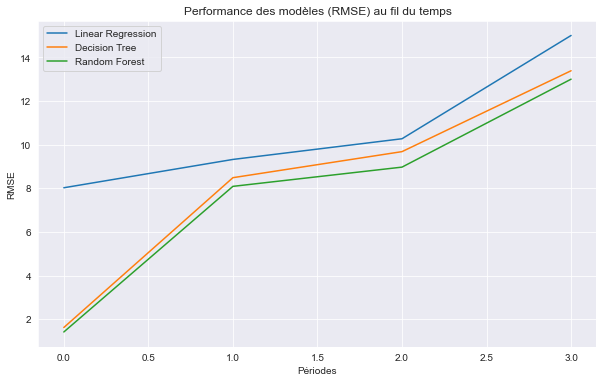

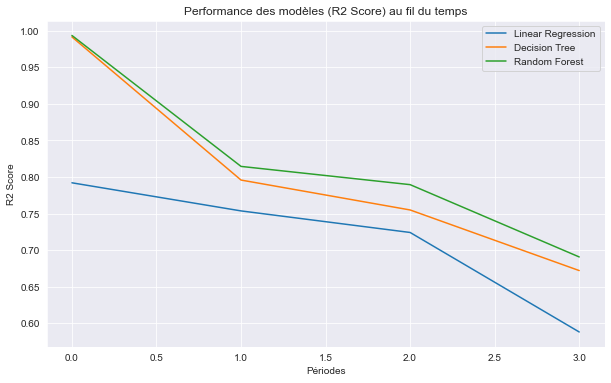

In [19]:
#Graphique de performance au fil du temps:

import matplotlib.pyplot as plt

def plot_performance(rmse_values, r2_values):
    periods = list(range(len(rmse_values['Linear Regression'])))
    
    # Tracer les graphiques RMSE
    plt.figure(figsize=(10, 6))
    for model, rmse_list in rmse_values.items():
        plt.plot(periods, rmse_list, label=model)
    plt.xlabel('Périodes')
    plt.ylabel('RMSE')
    plt.title('Performance des modèles (RMSE) au fil du temps')
    plt.legend()
    plt.show()

    # Tracer les graphiques R2
    plt.figure(figsize=(10, 6))
    for model, r2_list in r2_values.items():
        plt.plot(periods, r2_list, label=model)
    plt.xlabel('Périodes')
    plt.ylabel('R2 Score')
    plt.title('Performance des modèles (R2 Score) au fil du temps')
    plt.legend()
    plt.show()

# Utilisation des dictionnaires rmse_values et r2_values créés précédemment
plot_performance(rmse_values, r2_values)


### Analyse :

En examinant les performances des modèles sur différentes périodes, on observe que :
- Pour tous les modèles, les performances diminuent au fur et à mesure que les périodes avancent par rapport à la période 0. Cela se traduit par une augmentation du RMSE et une diminution du R2 score, ainsi que des points aberrrants.

- La forêt aléatoire est le modèle qui donne les meilleures performances sur toutes les périodes, bien qu'il montre également une dégradation des performances au fil du temps.

### Conclusion :

La dégradation des performances au fil du temps indique une dérive du modèle pour les trois modèles. Cela suggère que les modèles ne sont pas suffisamment robustes pour s'adapter aux changements dans les données. Par conséquent, il est nécessaire de mettre à jour les modèles pour s'assurer qu'ils restent performants et précis.

## 2 - Étude de la dérive des données.


### 2-1 Variable catégorielle: TopCategory
TopCategory : Catégorie de produits favorite du client.

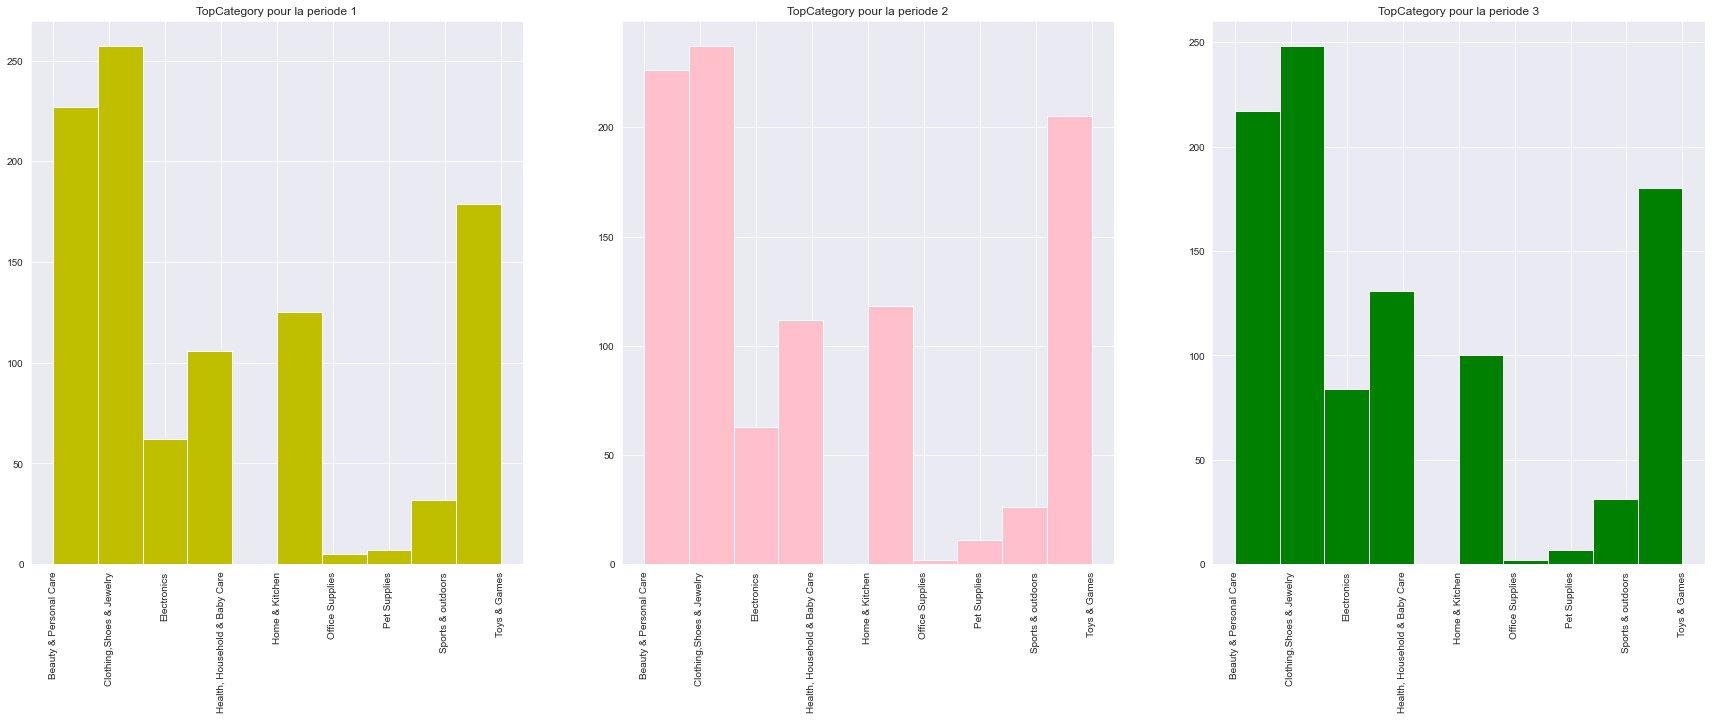

In [21]:
# Afficher les histogrammes avec les noms de catégories
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
ax[0].hist(X1["TopCategory"], color="y")
ax[0].set_title("TopCategory pour la periode 1")
ax[0].set_xticks(range(len(category_names)))
ax[0].set_xticklabels(category_names)

ax[1].hist(X2["TopCategory"],color="pink")
ax[1].set_title("TopCategory pour la periode 2")
ax[1].set_xticks(range(len(category_names)))
ax[1].set_xticklabels(category_names)

ax[2].hist(X3["TopCategory"],color="g")
ax[2].set_title("TopCategory pour la periode 3")
ax[2].set_xticks(range(len(category_names)))
ax[2].set_xticklabels(category_names)

for a in ax:
    a.tick_params(axis='x', rotation=90)
    
plt.show()

In [22]:
X1_category_dist = np.histogram(X1["TopCategory"], bins = 8)[0]
X1_category_dist = X1_category_dist / np.sum(X1_category_dist)

X2_category_dist = np.histogram(X2["TopCategory"], bins = 8)[0]
X2_category_dist = X2_category_dist / np.sum(X2_category_dist)

X3_category_dist = np.histogram(X3["TopCategory"], bins = 8)[0]
X3_category_dist = X3_category_dist / np.sum(X3_category_dist)


In [23]:
print("Distributions de TopCategory pour les 3 périodes :")
print("-"*50)
print("Periode 1:",X1_category_dist)
print("Periode 2:",X2_category_dist)
print("Periode 3:",X3_category_dist)

Distributions de TopCategory pour les 3 périodes :
--------------------------------------------------
Periode 1: [0.227 0.257 0.062 0.106 0.125 0.005 0.007 0.211]
Periode 2: [0.226 0.237 0.063 0.112 0.118 0.002 0.011 0.231]
Periode 3: [0.217 0.248 0.084 0.131 0.1   0.002 0.007 0.211]


In [24]:
print("Calcul de la divergence de Kullback–Leibler et la divergence de Jensen-Shannon:")
print("-"*50)
print("Periode 2 par rapport à 1")
print("la divergence de Kullback–Leibler est ={:.2},  et la divergence de Jensen-Shannon est ={:.2}".format(KLDivergence(X2_category_dist,X1_category_dist) ,
                                                                                                      JSDivergence(X2_category_dist,X1_category_dist)))
print(" ")
print("Periode 3 par rapport à 2")
print("la divergence de Kullback–Leibler est ={:.2},  et la divergence de Jensen-Shannon est ={:.2}".format(KLDivergence(X3_category_dist,X2_category_dist) ,
                                                                                                      JSDivergence(X3_category_dist,X2_category_dist)))

print(" ")
print("Periode 3 par rapport à 1")
print("la divergence de Kullback–Leibler est ={:.2},  et la divergence de Jensen-Shannon est ={:.2}".format(KLDivergence(X3_category_dist,X1_category_dist) ,
                                                                                                      JSDivergence(X3_category_dist,X1_category_dist)))



Calcul de la divergence de Kullback–Leibler et la divergence de Jensen-Shannon:
--------------------------------------------------
Periode 2 par rapport à 1
la divergence de Kullback–Leibler est =0.0042,  et la divergence de Jensen-Shannon est =0.0011
 
Periode 3 par rapport à 2
la divergence de Kullback–Leibler est =0.0083,  et la divergence de Jensen-Shannon est =0.0021
 
Periode 3 par rapport à 1
la divergence de Kullback–Leibler est =0.01,  et la divergence de Jensen-Shannon est =0.0026


### Commentaires : 

L'analyse montre que la variable TopCategory ne présente pas de grandes différences entre les distributions de probabilité des catégories entre les différentes périodes, sauf entre la période 3 et la période 1 où les différences sont plus marquées. Cela indique que la préférence des clients pour les catégories de produits reste relativement stable au fil du temps. Cependant, il est important de noter que l'analyse ne prend pas en compte les changements de comportement des clients individuels, qui peuvent influencer les tendances globales observées dans les distributions de probabilité.

### 2-2 Variables quantitatives: 

In [25]:
def analyser(feature, bins="auto"):

    mean_period0 = np.mean(X0[feature])
    var_period0  = np.var(X0[feature])


    X1_=  np.array(X1[feature])
    X1_ = (X1_ - mean_period0) / np.sqrt(var_period0)
    
    X2_=  np.array(X2[feature])
    X2_ = (X2_ - mean_period0) / np.sqrt(var_period0)


    X3_=  np.array(X3[feature])
    X3_ = (X3_ - mean_period0) / np.sqrt(var_period0)


        
    if bins == "auto":
        values = pd.concat([X1[feature], X2[feature], X3[feature]]).unique()
        values= sorted(np.array(values))
    else :
        values = bins
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

    ax[0].hist(X1[feature], bins=values ,color="y")
    ax[0].set_title("{} pour la periode 1".format(feature))


    ax[1].hist(X2[feature],bins=values ,color="pink")
    ax[1].set_title("{} pour la periode 2".format(feature))


    ax[2].hist(X3[feature],bins=values ,color="g")
    ax[2].set_title("{} pour la periode 3".format(feature))


    plt.show()
        
    print("Calcul de la Distance de Wasserstein :")
    print("-"*50)
    print("Periode 2 par rapport à 1")
    print("la Distance de Wasserstein est {:.3} pour l'ordre {}".format(WassersteinDistance(X2_,X1_,1),1))
    print("la Distance de Wasserstein est {:.3} pour l'ordre {}".format(WassersteinDistance(X2_,X1_,2),2))

    print(" ")

    print("Periode 3 par rapport à 2")
    print("la Distance de Wasserstein est {:.3} pour l'ordre {} ".format(WassersteinDistance(X3_,X2_,1),1))
    print("la Distance de Wasserstein est {:.3} pour l'ordre {} ".format(WassersteinDistance(X3_,X2_,2),2))


    print(" ")
    print("Periode 3 par rapport à 1")
    print("la Distance de Wasserstein est {:.3} pour l'ordre {}".format(WassersteinDistance(X3_,X1_,1),1))
    print("la Distance de Wasserstein est {:.3} pour l'ordre {}".format(WassersteinDistance(X3_,X1_,2),2))

### 1-2 Age
Age : âge du client en années.

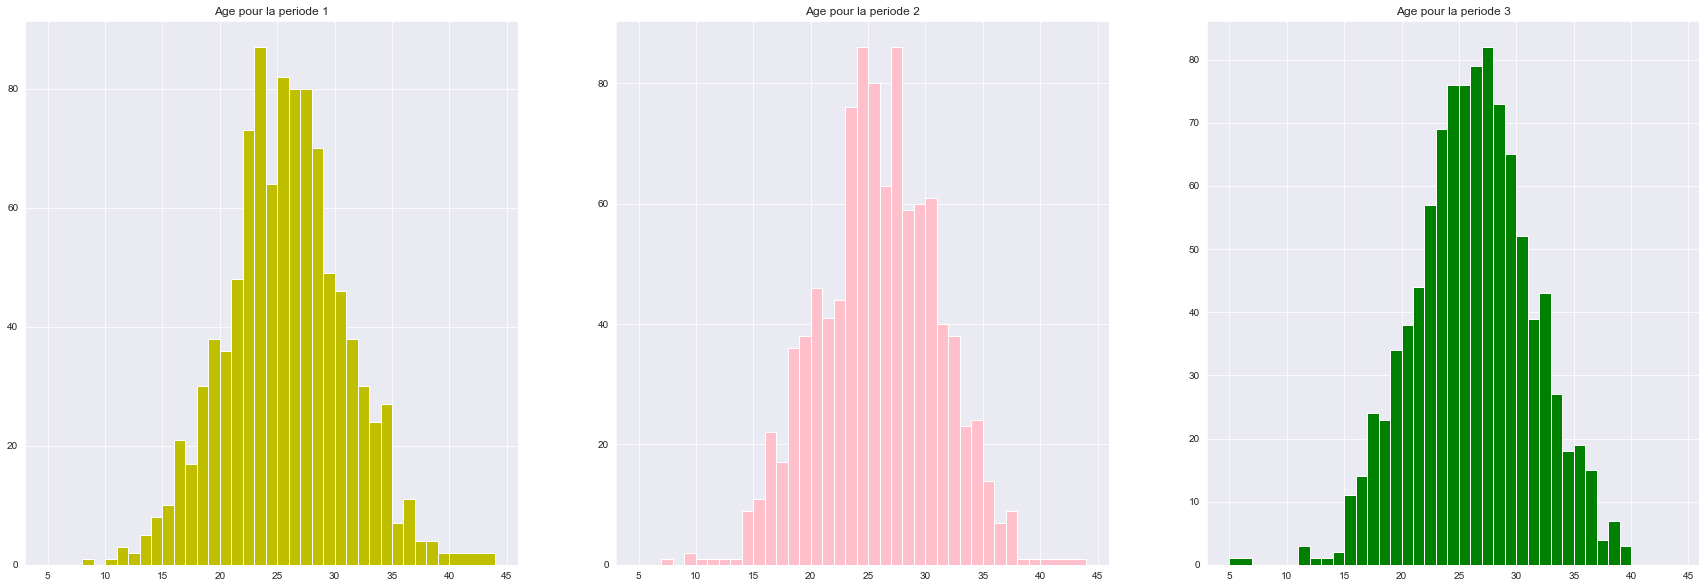

Calcul de la Distance de Wasserstein :
--------------------------------------------------
Periode 2 par rapport à 1
la Distance de Wasserstein est 0.0552 pour l'ordre 1
la Distance de Wasserstein est 0.107 pour l'ordre 2
 
Periode 3 par rapport à 2
la Distance de Wasserstein est 0.0888 pour l'ordre 1 
la Distance de Wasserstein est 0.136 pour l'ordre 2 
 
Periode 3 par rapport à 1
la Distance de Wasserstein est 0.125 pour l'ordre 1
la Distance de Wasserstein est 0.159 pour l'ordre 2


In [26]:
analyser("Age")

#### Commentaires :
Les résultats obtenus montrent que la distance de Wasserstein entre les périodes est relativement faible pour la variable "Age", ce qui indique que cette variable ne semble pas être très significative pour différencier les clients entre les périodes. En effet, la distance de Wasserstein entre les périodes 2 et 1 est de 0.0552 pour l'ordre 1, ce qui est faible et signifie qu'il y a peu de différence entre les âges des clients dans ces deux périodes. De même, la distance de Wasserstein entre les périodes 3 et 2 est de 0.0888 pour l'ordre 1, ce qui est également faible. La distance de Wasserstein entre les périodes 3 et 1 est légèrement plus élevée, mais reste relativement faible (0,125 pour l'ordre 1). Cela indique que l'âge n'est probablement pas un facteur déterminant pour prédire le comportement des clients dans cette entreprise.

### 1-3 Seniority
Seniority : ancienneté du client en années.

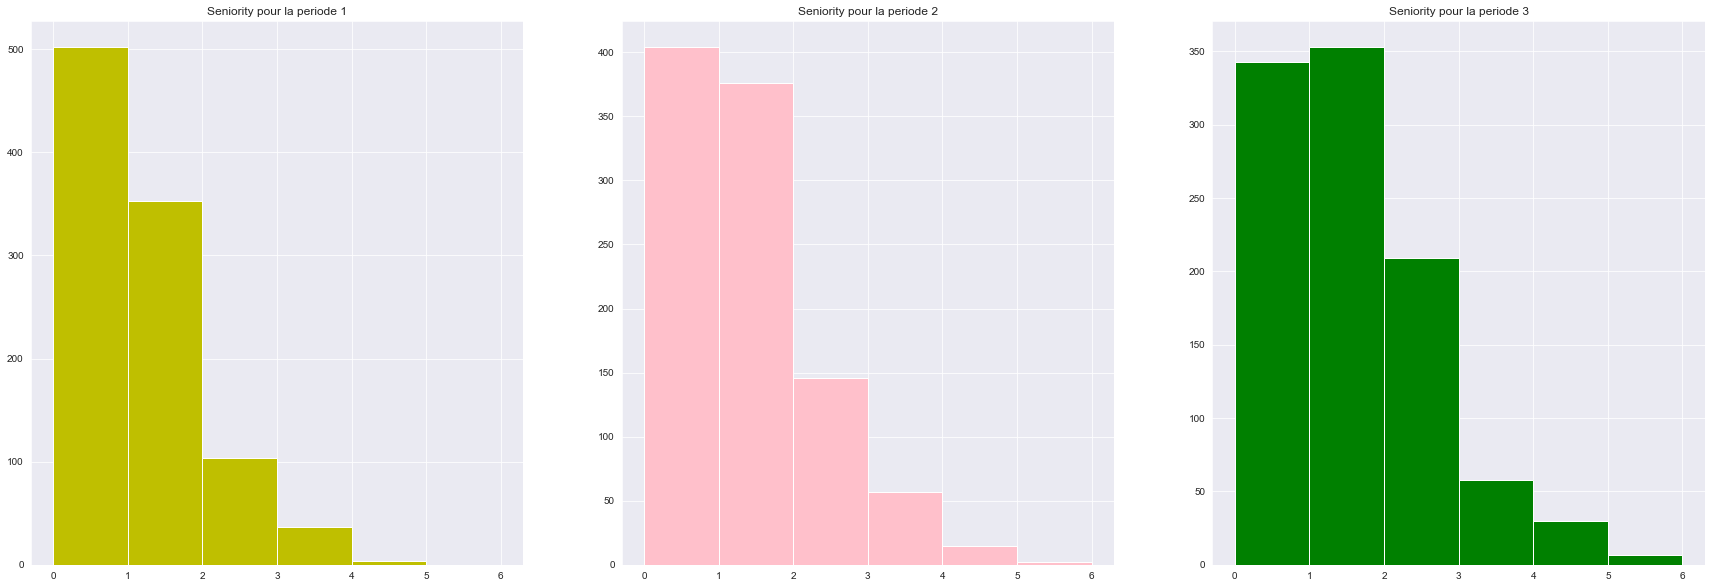

Calcul de la Distance de Wasserstein :
--------------------------------------------------
Periode 2 par rapport à 1
la Distance de Wasserstein est 0.307 pour l'ordre 1
la Distance de Wasserstein est 0.653 pour l'ordre 2
 
Periode 3 par rapport à 2
la Distance de Wasserstein est 0.268 pour l'ordre 1 
la Distance de Wasserstein est 0.61 pour l'ordre 2 
 
Periode 3 par rapport à 1
la Distance de Wasserstein est 0.575 pour l'ordre 1
la Distance de Wasserstein est 0.905 pour l'ordre 2


In [27]:
analyser("Seniority")

#### Commentaires :
Les distances de Wasserstein obtenues pour l'analyse de la variable Seniority sont relativement élevées, surtout pour les ordres supérieurs. Cela indique qu'il y a une différence significative dans la distribution de l'ancienneté du client entre les différentes périodes, ce qui est un indicateur de la fidélité du client à long terme. Nous pouvons utiliser cette information pour évaluer l'efficacité des programmes de fidélisation de la clientèle et pour déterminer si des changements sont nécessaires pour maintenir la satisfaction de la clientèle à long terme.

### 1-3 Orders
Orders : Nombre de commandes effectuées sur la période précédente.

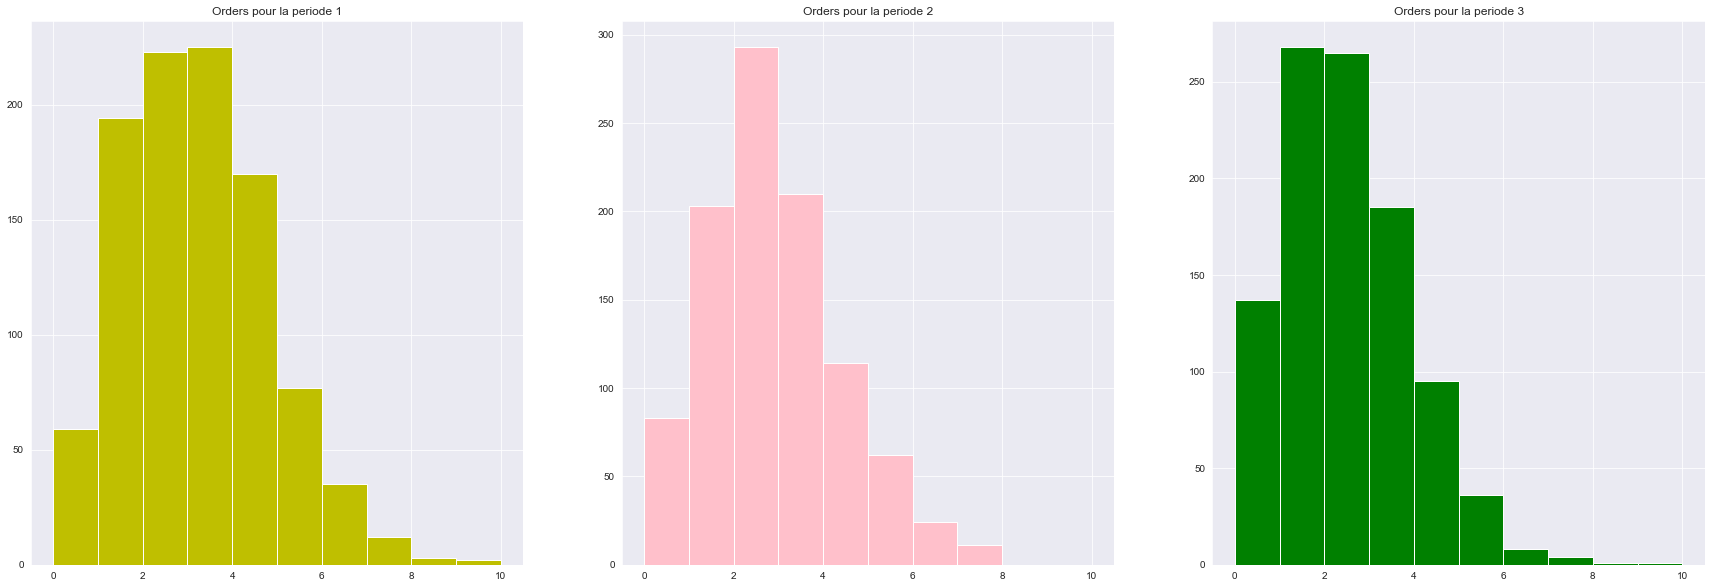

Calcul de la Distance de Wasserstein :
--------------------------------------------------
Periode 2 par rapport à 1
la Distance de Wasserstein est 0.18 pour l'ordre 1
la Distance de Wasserstein est 0.329 pour l'ordre 2
 
Periode 3 par rapport à 2
la Distance de Wasserstein est 0.235 pour l'ordre 1 
la Distance de Wasserstein est 0.369 pour l'ordre 2 
 
Periode 3 par rapport à 1
la Distance de Wasserstein est 0.411 pour l'ordre 1
la Distance de Wasserstein est 0.492 pour l'ordre 2


In [28]:
analyser("Orders")

#### Commentaires :
La distance de Wasserstein mesure la différence entre les distributions de probabilité de deux échantillons. Ici, on l'utilise pour mesurer la différence entre les distributions des nombres de commandes effectuées par les clients sur différentes périodes.

Les résultats montrent que les distances de Wasserstein entre les périodes 2 et 1, et entre les périodes 3 et 2, sont relativement faibles pour l'ordre 1 et l'ordre 2. Cela signifie que la distribution des nombres de commandes est relativement stable entre ces périodes.

Cependant, la distance de Wasserstein entre les périodes 3 et 1 est plus importante, notamment pour l'ordre 2. Cela indique qu'il y a une différence plus importante dans la distribution des nombres de commandes entre ces deux périodes, et qu'il y a des changements significatifs dans le comportement des clients.

### 1-4 Items
Items : Nombre d'items commandés sur la période précédente.

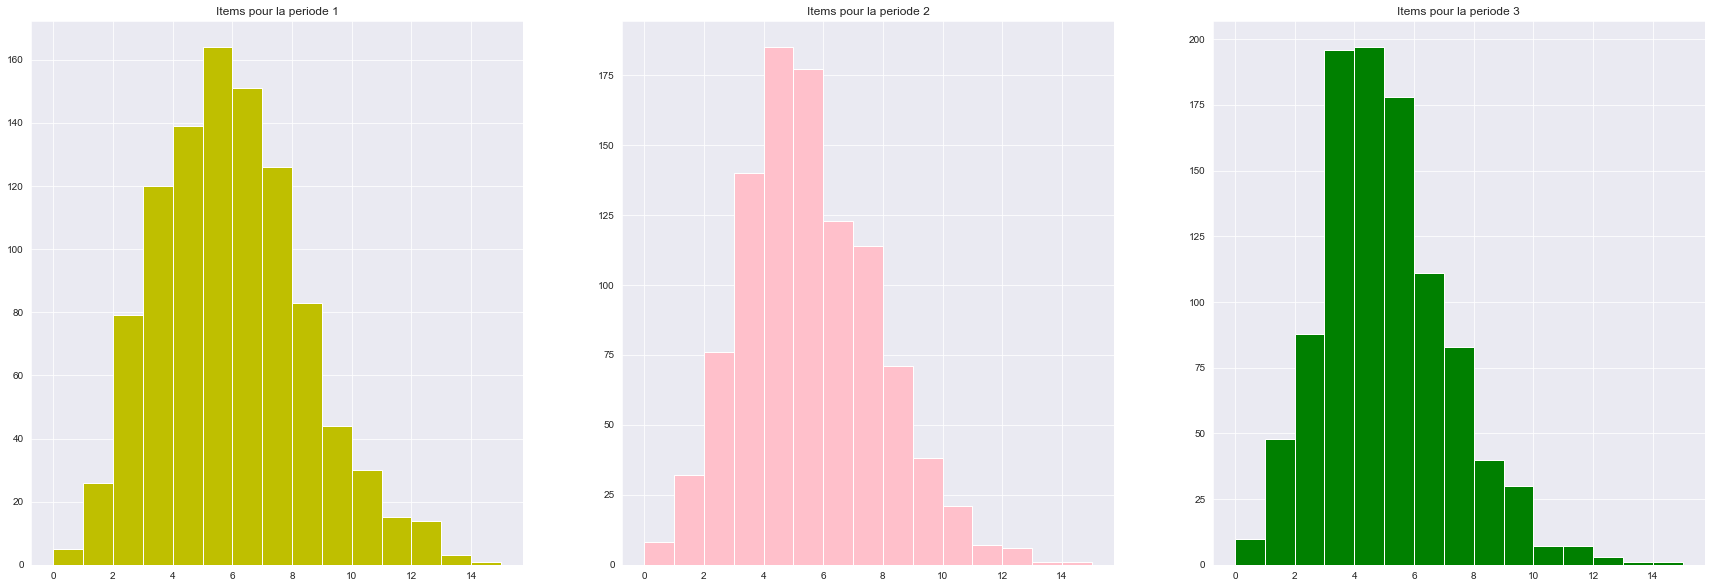

Calcul de la Distance de Wasserstein :
--------------------------------------------------
Periode 2 par rapport à 1
la Distance de Wasserstein est 0.164 pour l'ordre 1
la Distance de Wasserstein est 0.264 pour l'ordre 2
 
Periode 3 par rapport à 2
la Distance de Wasserstein est 0.219 pour l'ordre 1 
la Distance de Wasserstein est 0.302 pour l'ordre 2 
 
Periode 3 par rapport à 1
la Distance de Wasserstein est 0.383 pour l'ordre 1
la Distance de Wasserstein est 0.444 pour l'ordre 2


In [29]:
analyser("Items")

#### Commentaires :
Les résultats obtenus pour la distance de Wasserstein entre les périodes montrent une dérive des données au fil du temps pour la variable "Items", ce qui suggére une évolution des comportements d'achat des clients ou un changement dans l'offre proposée par l'entreprise. Les valeurs de distance de Wasserstein augmentent au fil des périodes, ce qui indique que la différence entre les distributions des périodes est plus importante. Il est intéressant de prendre en compte cette évolution dans la construction des modèles pour maintenir leur performance et leur précision.

### 1-5 AverageDiscount
AverageDiscount : Réduction moyenne accordée au client sur la période précédente en pourcentage.


C:\Users\dell\AppData\Local\Temp\ipykernel_1836\302653424.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins == "auto":


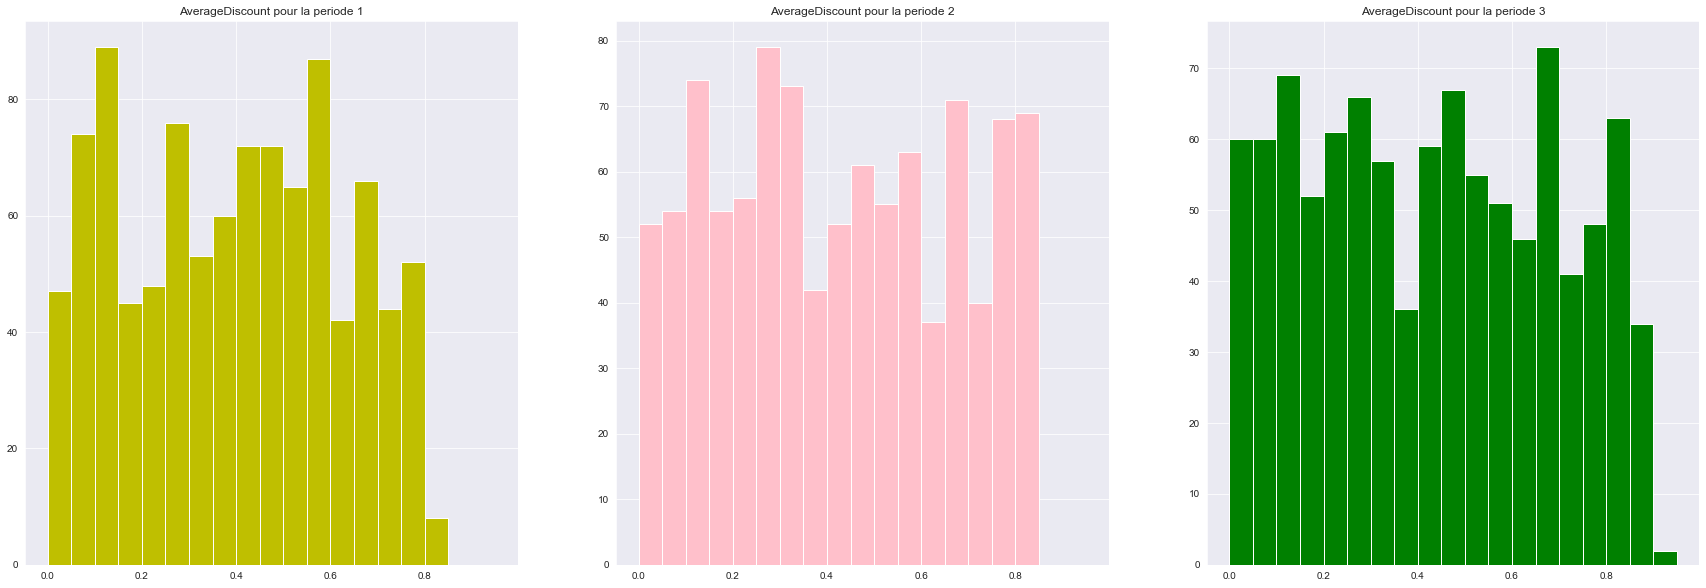

Calcul de la Distance de Wasserstein :
--------------------------------------------------
Periode 2 par rapport à 1
la Distance de Wasserstein est 0.131 pour l'ordre 1
la Distance de Wasserstein est 0.17 pour l'ordre 2
 
Periode 3 par rapport à 2
la Distance de Wasserstein est 0.0588 pour l'ordre 1 
la Distance de Wasserstein est 0.0748 pour l'ordre 2 
 
Periode 3 par rapport à 1
la Distance de Wasserstein est 0.165 pour l'ordre 1
la Distance de Wasserstein est 0.222 pour l'ordre 2


In [30]:
bins = np.arange(0,1,0.05)
analyser("AverageDiscount", bins = bins)

#### Commentaires :
On remarque que la distance de Wasserstein pour la variable "AverageDiscount" diminue entre la période 2 et la période 3. Cela suggére que la réduction moyenne accordée au client a été plus stable dans la période 3 par rapport à la période 2.

Cependant, la distance de Wasserstein pour la période 3 par rapport à la période 1 a augmenté, ce qui  indique un changement plus important dans les réductions moyennes accordées au client entre ces deux périodes.

En examinant les histogrammes, on voie que la distribution des réductions moyennes accordées au client a tendance à se resserrer autour d'une valeur plus élevée au fil du temps. Cela indique que l'entreprise accorde des réductions moins importantes mais plus régulières aux clients au fil du temps.

Il est important de continuer à surveiller cette variable pour voir si cette tendance se poursuit et si cela a un impact sur les ventes et la fidélité des clients.

### 1-6 BrowsingTime
BrowsingTime : Temps total passé sur le site web sur la période précédente en secondes.


C:\Users\dell\AppData\Local\Temp\ipykernel_1836\302653424.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins == "auto":


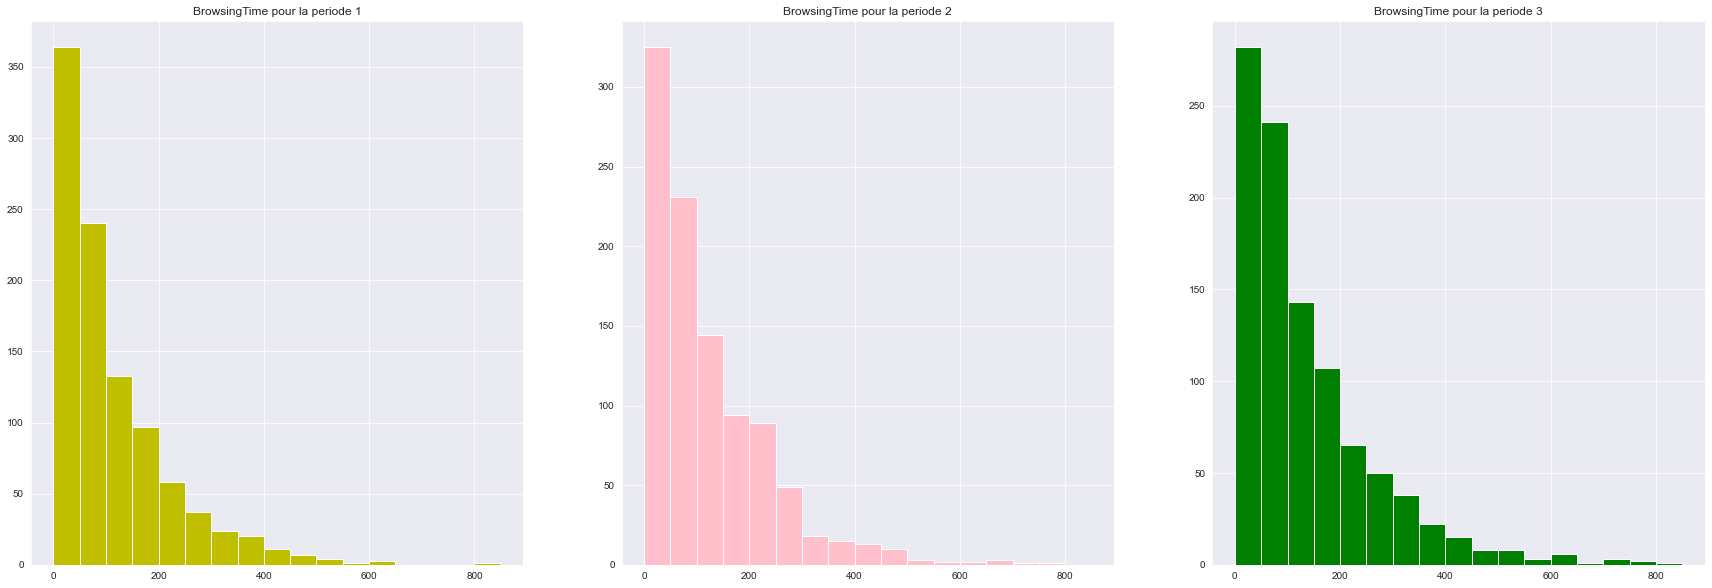

Calcul de la Distance de Wasserstein :
--------------------------------------------------
Periode 2 par rapport à 1
la Distance de Wasserstein est 0.0962 pour l'ordre 1
la Distance de Wasserstein est 0.132 pour l'ordre 2
 
Periode 3 par rapport à 2
la Distance de Wasserstein est 0.208 pour l'ordre 1 
la Distance de Wasserstein est 0.441 pour l'ordre 2 
 
Periode 3 par rapport à 1
la Distance de Wasserstein est 0.299 pour l'ordre 1
la Distance de Wasserstein est 0.519 pour l'ordre 2


In [31]:
bins = np.arange(0,900,50)

analyser("BrowsingTime",bins=bins)

#### Commentaires :
Dans la première période, la majorité des clients ont passé entre 0 et 300 secondes sur le site web, avec une moyenne autour de 100 secondes. Dans la deuxième période, il y a une légère augmentation de la durée moyenne de navigation, avec une majorité de clients passant entre 0 et 400 secondes sur le site web, avec une moyenne autour de 150 secondes. Dans la troisième période, on observe une augmentation significative de la durée moyenne de navigation, avec une majorité de clients passant entre 0 et 800 secondes sur le site web, avec une moyenne autour de 400 secondes. Les distances de Wasserstein entre les périodes indiquent que la distribution des temps de navigation a évolué significativement, en particulier entre la période 2 et 3. Cela suggére que les clients passent plus de temps sur le site web pour trouver ce qu'ils cherchent, ce qui pourrait être dû à une amélioration de l'interface utilisateur ou de la qualité des recommandations proposées.

### 1-7 EmailsOpened
EmailsOpened : Nombre de mails marketing ouverts par le client sur la période précédente.


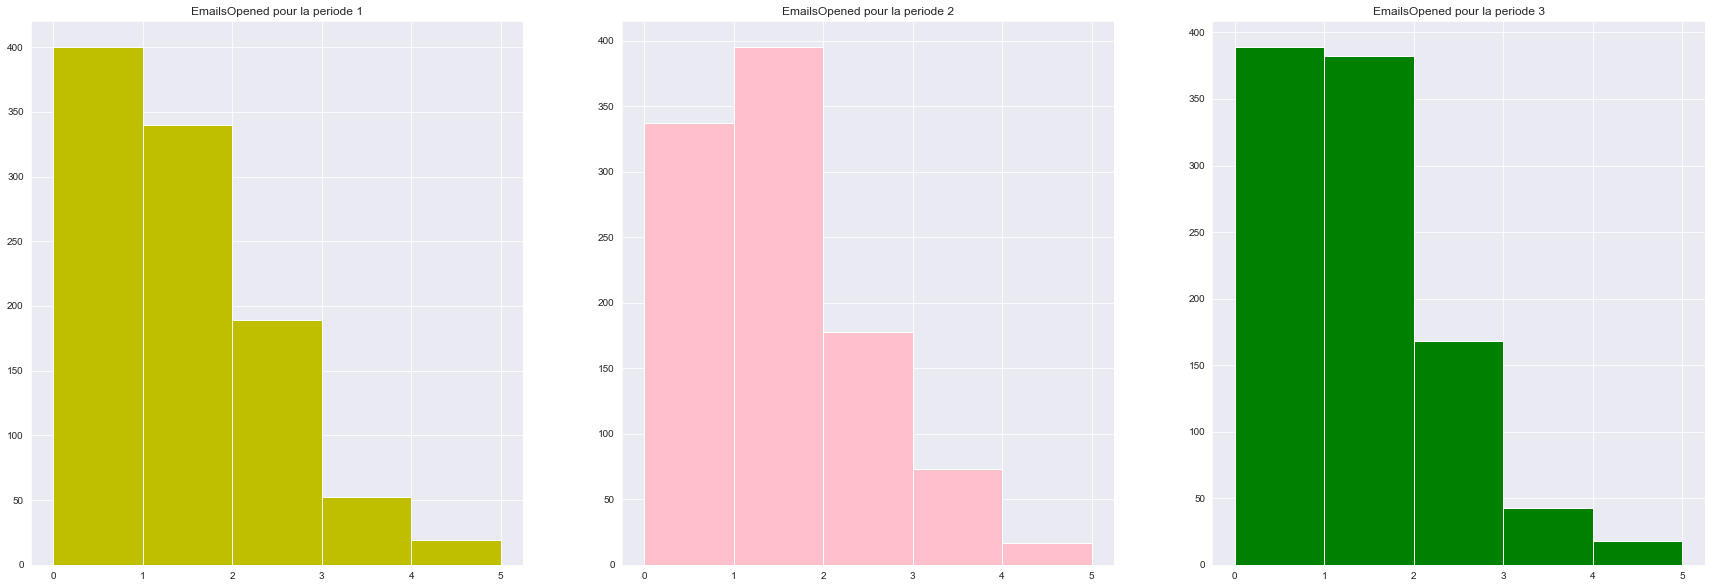

Calcul de la Distance de Wasserstein :
--------------------------------------------------
Periode 2 par rapport à 1
la Distance de Wasserstein est 0.0918 pour l'ordre 1
la Distance de Wasserstein est 0.303 pour l'ordre 2
 
Periode 3 par rapport à 2
la Distance de Wasserstein est 0.121 pour l'ordre 1 
la Distance de Wasserstein est 0.347 pour l'ordre 2 
 
Periode 3 par rapport à 1
la Distance de Wasserstein est 0.0529 pour l'ordre 1
la Distance de Wasserstein est 0.23 pour l'ordre 2


In [32]:
analyser("EmailsOpened")

#### Commentaires :
Les résultats montrent des distances de Wasserstein relativement faibles pour la plupart des comparaisons de périodes, ce qui suggère une certaine stabilité dans la variable "EmailsOpened". Cependant, la distance de Wasserstein entre la période 2 et la période 3 pour l'ordre 2 est assez élevée, ce qui indique une possible rupture ou un changement significatif dans le comportement du client en matière d'ouverture d'e-mails marketing. Il est utile d'examiner cette période plus en détail pour identifier les raisons de ce changement.


### 1- 8 SupportInteractions 
SupportInteractions : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

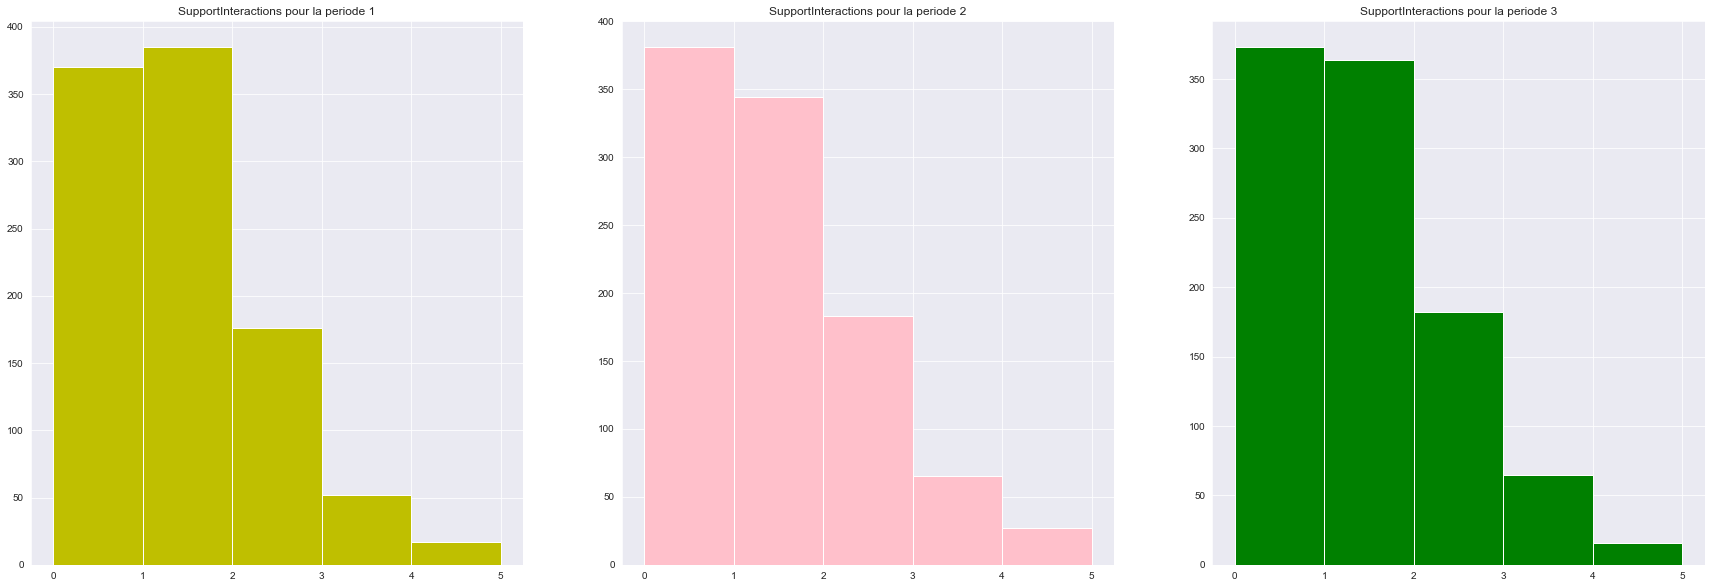

Calcul de la Distance de Wasserstein :
--------------------------------------------------
Periode 2 par rapport à 1
la Distance de Wasserstein est 0.0744 pour l'ordre 1
la Distance de Wasserstein est 0.27 pour l'ordre 2
 
Periode 3 par rapport à 2
la Distance de Wasserstein est 0.0431 pour l'ordre 1 
la Distance de Wasserstein est 0.205 pour l'ordre 2 
 
Periode 3 par rapport à 1
la Distance de Wasserstein est 0.0333 pour l'ordre 1
la Distance de Wasserstein est 0.18 pour l'ordre 2


In [33]:
analyser("SupportInteractions")

#### Commentaires :
Les résultats montrent une distance de Wasserstein relativement faible entre les périodes pour cette variable, ce qui indique une certaine stabilité dans le comportement des clients. Cependant, la distance de Wasserstein entre la période 2 et la période 1 est plus élevée que celle entre la période 3 et la période 2, ce qui indique une tendance à réduire les interactions avec le service client au fil du temps.

## Conclusion

En conclusion, l'analyse des variables: Age, Seniority, Orders, Items, AverageDiscount, TopCategory, BrowsingTime, EmailsOpened et SupportInteractions a révélé des différences significatives entre les distributions de probabilité de ces variables d'une période à l'autre.

Cela suggère que les comportements et les préférences des clients ont évolué au fil du temps, ce qui peut être dû à des changements dans l'environnement commercial ou dans les stratégies de l'entreprise. Par conséquent, nous devons être attentifs à ces changements afin de pouvoir adapter leur stratégie de marketing et de vente en conséquence.

En ce qui concerne la dérive des modèles, les résultats montrent que les modèles prédictifs basés sur les données de la période précédente ne sont pas toujours capables de prédire avec précision les comportements des clients à l'avenir. Cela est dû à la dérive des données, c'est-à-dire aux changements dans les comportements des clients au fil du temps, ou à d'autres facteurs tels que des erreurs de modélisation.

Il est donc important de surveiller régulièrement les performances de leurs modèles prédictifs et de les ajuster en fonction des changements dans les comportements des clients et dans l'environnement commercial. L'utilisation de techniques de réapprentissage régulier ou de modèles plus flexibles aide à réduire l'impact de la dérive des données et à améliorer la précision des prévisions.